In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%config InlineBackend.figure_formats = ['svg']

In [48]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

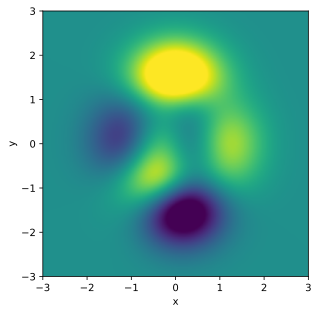

In [49]:
# create the landscape
x = np.linspace(-3,3,201)  # x轴 (x-axis)
y = np.linspace(-3,3,201)  # y轴 (y-axis)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.xlabel('x')  # 添加x轴标签
plt.ylabel('y')  # 添加y轴标签
plt.show()

In [50]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

print(df_x(1,1).evalf())
print(df_y(1,1).evalf())

-1.07369833656079
1.89918592997863


[0.228278920556369 -1.62553495750000]
[-0.75215817 -1.69183946]


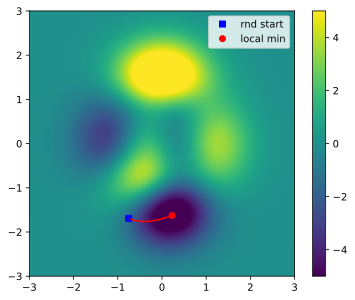

In [59]:
localmin = np.random.rand(2) * 4 - 2
startpnt = localmin[:]

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0], localmin[1]),
        df_y(localmin[0], localmin[1])
    ])
    localmin = localmin - learning_rate*grad
    trajectory[i, :] = localmin

print(localmin)
print(startpnt)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()